# Momentum - Energy Futures

### Momentum

- <u>__Objective__</u> <br>
The objective of this notebook is to test Momentum based trading strategies on a portfolio of futures contracts of 4 commodities: crude oil, natural gas, heating oil and gasoline. We test volatility for three time horizons: 15 day, 30 day and 40 day, and calculate the momentum based on the compounded returns over these time horizons.
<br>

- <u>__Method__</u> <br>
We create quintiles of the return momentum for the three time horizons

- <u>__Strategy__</u> <br> Buy when momentum is high, sell when momentum is high.<br>
We buy futures contracts which are in quintile 5 and and sell contracts which are in quintile 1.

- <u>__Results__</u> <br>
Our results show these momentum based strategies to be ineffective for the selected energy futures. The 30 day momentum horizon yields the best results, but still falls short in delivering a desirable sharpe ratio and significant returns.

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
from functools import reduce
pd.set_option("display.max_columns", None)

In [2]:
#read in energy futures data and daily risk-free rates data (obtained from WRDS)
# Defining Paths
crude_path = 'CrudeOil/'
gas_path = 'Gasoline/'
natgas_path = 'NatGas/'
heatoil_path = 'HeatOil/'

# Loading datasets
crude = pd.read_csv(crude_path + "Crude_Oil.txt",sep="\t")
gas = pd.read_csv(gas_path + "gasoline.txt",sep="\t")
natgas = pd.read_csv(natgas_path + "Natural_Gas.txt",sep="\t")
heatoil = pd.read_csv(heatoil_path + "Heating_Oil.txt",sep="\t")
# coverting to datetime columns
commodities = [crude,gas,natgas,heatoil]
for i in commodities:
    i.Date = pd.to_datetime(i.Date,dayfirst=True)

# Loading Daily Risk Free Returns
rf = pd.read_csv("Rf.csv",header=0,names=['date','RF'])
rf.date = pd.to_datetime(rf.date)
rf.set_index('date', inplace = True)

# Merging dataframes
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), commodities)

In [3]:
# Previewing new merged data
df_merged.head()

,Date,RCLC1,RCLC2,RCLC3,RCLC4,RCLC5,RCLC6,RCLC12,LLCC1,LLCC2,LLCC3,LLCC4,LLCC5,LLCC6,LLCC12,RBC1,RBC2,RBC3,RBC4,RBC5,RBC6,RBC7,RBC8,RBC9,RBC10,RBC11,RBC12,NGHenry,NNGC1,NNGC2,NNGC3,NNGC4,NNGC5,NNGC6,NNGC7,NNGC8,NNGC9,NNGC10,NNGC11,NNGC12,HOTC1,HOTC2,HOTC3,HOTC4,HOTC5,HOTC6,HOTC7,HOTC8,HOTC9,HOTC10,HOTC11,HOTC12
0,2005-10-03,65.47,65.29,65.69,65.97,66.16,66.24,65.77,62.80,63.52,64.13,64.50,64.72,64.82,64.45,1.8888,1.8653,1.8543,1.9408,1.9408,1.9328,1.9198,1.8983,1.8703,1.7653,1.7253,1.6953,14.84,14.017,14.557,14.892,14.617,14.127,10.977,10.442,10.442,10.472,10.502,10.477,10.504,2.0809,2.1098,2.1273,2.1248,2.0898,2.0223,1.9633,1.9223,1.9208,1.9273,1.9408,1.9578
1,2005-10-04,63.90,63.76,64.26,64.64,64.85,64.95,64.60,61.22,61.96,62.59,63.02,63.27,63.40,63.17,1.8453,1.8253,1.8168,1.9418,1.9443,1.9293,1.8968,1.8768,1.8468,1.7343,1.6943,1.6643,14.84,14.224,14.764,15.119,14.834,14.329,11.044,10.504,10.504,10.532,10.557,10.532,10.559,2.0497,2.0834,2.1054,2.1069,2.0719,2.0044,1.9454,1.9054,1.9044,1.9114,1.9254,1.9429
2,2005-10-05,62.79,62.69,63.21,63.64,63.92,64.07,63.87,60.12,60.92,61.62,62.08,62.39,62.53,62.42,1.7650,1.7475,1.7400,1.8650,1.8675,1.8525,1.8260,1.8000,1.7700,1.6700,1.6400,1.6200,14.84,14.183,14.731,15.131,14.906,14.406,10.981,10.441,10.436,10.461,10.486,10.456,10.481,2.0148,2.0490,2.0760,2.0785,2.0455,1.9795,1.9225,1.8835,1.8835,1.8910,1.9055,1.9235
3,2005-10-06,61.36,61.06,61.45,61.84,62.12,62.29,62.22,58.37,59.09,59.75,60.19,60.53,60.78,60.91,1.7200,1.7050,1.7000,1.8250,1.8300,1.8150,1.7900,1.7650,1.7350,1.6350,1.6050,1.5850,14.84,13.375,13.895,14.260,14.120,13.695,10.695,10.205,10.200,10.225,10.255,10.230,10.260,1.9507,1.9864,2.0134,2.0174,1.9924,1.9304,1.8754,1.8394,1.8394,1.8474,1.8624,1.8809
4,2005-10-07,61.84,61.62,62.04,62.46,62.76,62.95,62.95,59.21,59.65,60.22,60.65,60.96,61.21,61.34,1.7400,1.7325,1.7300,1.8550,1.8600,1.8500,1.8250,1.8000,1.7700,1.6700,1.6400,1.6200,13.67,13.226,13.762,14.141,14.011,13.601,10.671,10.216,10.216,10.246,10.276,10.251,10.281,1.9601,2.0023,2.0308,2.0358,2.0128,1.9528,1.8988,1.8648,1.8648,1.8733,1.8888,1.9078


### Creating Daily returns for each asset

In [4]:
# Reshaping data to index by contract and date
cols = list(df_merged.columns)[1:]
df = pd.melt(df_merged, id_vars=['Date'], value_vars=cols)
# Indicator for not Beginning of Month
df['BOM_not'] = (df.Date.shift(1).dt.month == df.Date.dt.month).astype(int)
# renaming columns and setting multi index
df.columns = ['date', 'contract', 'price', 'BOM_not']
df.set_index(['contract', 'date'], inplace = True)
# df

In [5]:
# Calculating Return
df['lag_price'] = df['price'].groupby('contract').shift()
df['RET'] = (df['price']/df['lag_price'] - 1)*df['BOM_not']
df.drop(columns = ['price', 'lag_price', 'BOM_not'], inplace = True)
df

RET
contract date                
RCLC1    2005-10-03       NaN
         2005-10-04 -0.023980
         2005-10-05 -0.017371
         2005-10-06 -0.022774
         2005-10-07  0.007823
...                       ...
HOTC12   2014-02-12 -0.000445
         2014-02-13 -0.000651
         2014-02-14  0.005041
         2014-02-17  0.000000
         2014-02-18  0.008906

[111537 rows x 1 columns]

### Calculating Momentum 

In [6]:
# Assigning values to key variables
minlag = 2
# maxlag = 30
numbins = 5
# pastrettype = 'sum'
pastrettype = 'comp'
# pastrettype = 'sharpe'
maxlaglist = [15, 30, 45, 60]

In [7]:
# Calculating Momentum based on Compounded Returns
if pastrettype=='comp':
    for maxlag in maxlaglist:
        df['CUMGROSSRET'] = (1+df['RET']).groupby('contract').cumprod()
        df['MOM_' + str(maxlag)] = \
        df['CUMGROSSRET'].groupby('contract').shift(minlag) / df['CUMGROSSRET'].groupby('contract').shift(maxlag) - 1

In [8]:
# Calculating Momentum based on Summed Returns
if pastrettype=='sum':
    for maxlag in maxlaglist:
        df['CUMRETSUM'] = df['RET'].groupby('contract').cumsum()
        df['MOM_' + str(maxlag)] = \
        df['CUMRETSUM'].groupby('contract').shift(minlag) - df['CUMRETSUM'].groupby('contract').shift(maxlag)

In [9]:
# Calculating Momentum based on Sharpe Ratio
if pastrettype=='sharpe':
    for maxlag in maxlaglist:
        df['ROLLMEAN'] = df['RET'].groupby('contract', group_keys=False).rolling(maxlag-minlag).mean()
        df['ROLLSD']   = df['RET'].groupby('contract', group_keys=False).rolling(maxlag-minlag).std()
        df['MOM_' + str(maxlag)] = \
        df['ROLLMEAN'].groupby('contract').shift(minlag) / df['ROLLSD'].groupby('contract').shift(minlag)

In [10]:
# Dropping NA Values, creating Excess return
df.dropna(subset=['RET'] + ['MOM_' + str(i) for i in maxlaglist], inplace=True)
df['XRET'] = df['RET'] - rf['RF']
df.fillna(value = 0, inplace = True) 
# there are a few missing values in the risk free returns dataset

### Creating Momentum Quantiles and displaying results

In [11]:
df

RET  CUMGROSSRET    MOM_15    MOM_30    MOM_45  \
contract date                                                              
RCLC1    2005-12-27 -0.004621     0.869564 -0.025192  0.005279 -0.084006   
         2005-12-28  0.028542     0.894383 -0.013173 -0.010353 -0.057127   
         2005-12-29  0.008358     0.901859 -0.041213  0.012000 -0.068090   
         2005-12-30  0.011936     0.912624  0.007240  0.044593 -0.043527   
         2006-01-02  0.000000     0.912624 -0.015987  0.024846 -0.011970   
...                       ...          ...       ...       ...       ...   
HOTC12   2014-02-12 -0.000445     1.448337  0.008008 -0.022814 -0.019101   
         2014-02-13 -0.000651     1.447394  0.016456  0.008477 -0.003904   
         2014-02-14  0.005041     1.454691  0.014560  0.021070 -0.000950   
         2014-02-17  0.000000     1.454691  0.019623  0.017708 -0.005571   
         2014-02-18  0.008906     1.467647  0.017178  0.022625  0.006972   

                       MOM_60      XRET  
contract date                            
RCLC1    2005-12-27 -0.104935 -0.004715  
         2005-12-28 -0.089112  0.028447  
         2005-12-29 -0.072191  0.008259  
         2005-12-30 -0.053117  0.011827  
         2006-01-02 -0.044584  0.000000  
...                       ...       ...  
HOTC12   2014-02-12 -0.000232 -0.000446  
         2014-02-13 -0.008226 -0.000651  
         2014-02-14 -0.015919  0.005041  
         2014-02-17 -0.013788  0.000000  
         2014-02-18 -0.014272  0.008906  

[108426 rows x 7 columns]

In [12]:
# defining quantiles function
def quantiles(inser):
    outser = pd.qcut(inser, q=numbins, labels=range(1,numbins+1))
    return outser

In [13]:
# Making Quantiles
ports = {}
stats = {}
for i in maxlaglist:
    df['QUANTILE_' + str(i)] = df['MOM_' + str(i)].groupby('date').apply(quantiles)
    # Calculating Portfolios
    ports[i] = df.groupby(['QUANTILE_' + str(i),'date'])['XRET'].mean()
    # Calculating Stats for each quantile
    stats[i] = ports[i].groupby(['QUANTILE_'  + str(i)]).describe()
    stats[i]['sharpe'] = stats[i]['mean'] / stats[i]['std'] * np.sqrt(12)

In [14]:
# Displaying stats for 15-day momentum based trading strategy
stats[15]

,count,mean,std,min,25%,50%,75%,max,sharpe
QUANTILE_15,,,,,,,,,
1,2126.0,0.000423,0.019302,-0.081166,-0.009904,0.0,0.010172,0.111560,0.075899
2,2126.0,0.000364,0.016652,-0.083942,-0.008038,0.0,0.008878,0.101803,0.075682
3,2126.0,0.000501,0.016723,-0.085319,-0.007625,0.0,0.008998,0.115724,0.103699
4,2126.0,0.000344,0.016138,-0.080132,-0.007786,0.0,0.008480,0.085424,0.073828
5,2126.0,-0.000050,0.018140,-0.091904,-0.009738,0.0,0.009426,0.091143,-0.009566


In [15]:
# Displaying stats for 30-day momentum based trading strategy
stats[30]

,count,mean,std,min,25%,50%,75%,max,sharpe
QUANTILE_30,,,,,,,,,
1,2126.0,-0.000024,0.019408,-0.091749,-0.010163,-6.940000e-07,0.009694,0.107323,-0.004197
2,2126.0,0.000502,0.016686,-0.088309,-0.007697,0.000000e+00,0.009217,0.101759,0.104318
3,2126.0,0.000377,0.016627,-0.075982,-0.007626,0.000000e+00,0.008799,0.094026,0.078551
4,2126.0,0.000415,0.015843,-0.079288,-0.007641,0.000000e+00,0.008467,0.079068,0.090684
5,2126.0,0.000355,0.017830,-0.082393,-0.009123,0.000000e+00,0.009863,0.090329,0.068982


In [16]:
# Displaying stats for 45-day momentum based trading strategy
stats[45]

,count,mean,std,min,25%,50%,75%,max,sharpe
QUANTILE_45,,,,,,,,,
1,2126.0,-0.000110,0.019756,-0.079382,-0.010607,-6.250000e-07,0.009511,0.114079,-0.019288
2,2126.0,0.000368,0.016788,-0.090089,-0.007709,0.000000e+00,0.008880,0.104857,0.076011
3,2126.0,0.000478,0.016871,-0.081119,-0.007818,0.000000e+00,0.008706,0.113996,0.098067
4,2126.0,0.000548,0.015986,-0.078210,-0.007489,0.000000e+00,0.008643,0.080956,0.118689
5,2126.0,0.000351,0.017714,-0.075660,-0.009135,0.000000e+00,0.010109,0.089648,0.068592


In [17]:
stats[60]

,count,mean,std,min,25%,50%,75%,max,sharpe
QUANTILE_60,,,,,,,,,
1,2126.0,0.000112,0.019422,-0.081200,-0.010809,-2.085000e-07,0.009529,0.119985,0.019908
2,2126.0,0.000378,0.016819,-0.088625,-0.007414,0.000000e+00,0.008616,0.108840,0.077844
3,2126.0,0.000493,0.016902,-0.096069,-0.007524,0.000000e+00,0.009046,0.106549,0.101005
4,2126.0,0.000362,0.016141,-0.085210,-0.007644,0.000000e+00,0.008523,0.081973,0.077789
5,2126.0,0.000267,0.017623,-0.082287,-0.009223,0.000000e+00,0.010209,0.080560,0.052569


### Trading Rule
Buy futures contracts in the highest quintile of momentum, sell futures contracts in the lowest quintile of momentum 

In [18]:
# Summarizing Each Strategy
highminuslow = {}
for i in maxlaglist:
    highminuslow[i] = ports[i].loc[numbins] - ports[i].loc[1]
    print(str(i) + ' day Momentum based strategy')
    print(highminuslow[i].describe(), '\n')

15 day Momentum based strategy
count    2126.000000
mean       -0.000473
std         0.019990
min        -0.142620
25%        -0.010581
50%         0.000000
75%         0.009756
max         0.095724
Name: XRET, dtype: float64 

30 day Momentum based strategy
count    2126.000000
mean        0.000379
std         0.019534
min        -0.093498
25%        -0.009775
50%         0.000000
75%         0.010608
max         0.090546
Name: XRET, dtype: float64 

45 day Momentum based strategy
count    2126.000000
mean        0.000461
std         0.020170
min        -0.140996
25%        -0.009719
50%         0.000000
75%         0.011338
max         0.089427
Name: XRET, dtype: float64 

60 day Momentum based strategy
count    2126.000000
mean        0.000156
std         0.019699
min        -0.145201
25%        -0.009801
50%         0.000000
75%         0.009702
max         0.095822
Name: XRET, dtype: float64 



15 day Momentum based strategy
t-stat:  -1.0910233141453072
Sharpe Ratio: -0.0819677519135696
30 day Momentum based strategy
t-stat:  0.8935464607629166
Sharpe Ratio: 0.06713146609194111
45 day Momentum based strategy
t-stat:  1.053269748442161
Sharpe Ratio: 0.07913135523231958
60 day Momentum based strategy
t-stat:  0.3646981059607133
Sharpe Ratio: 0.02739949136298211


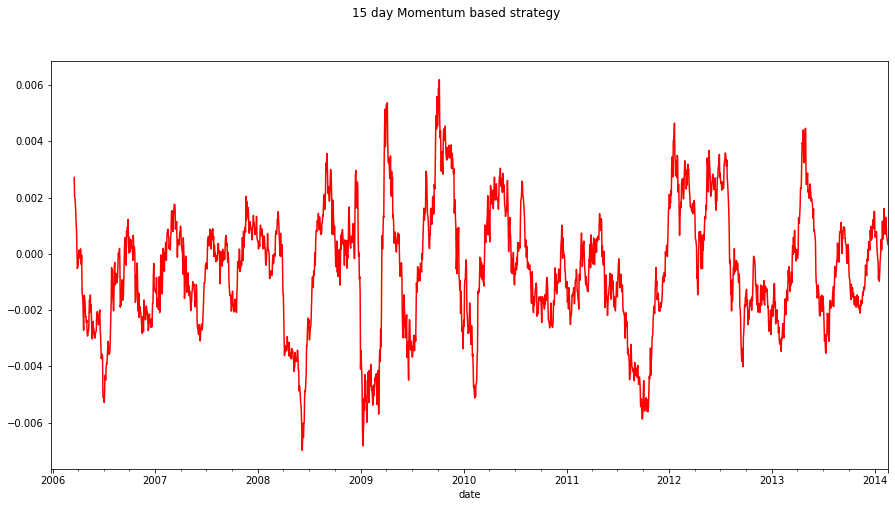

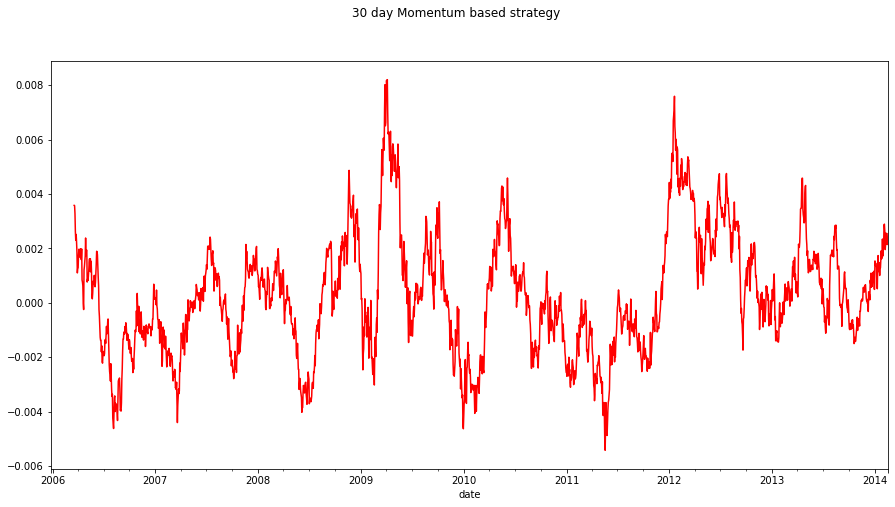

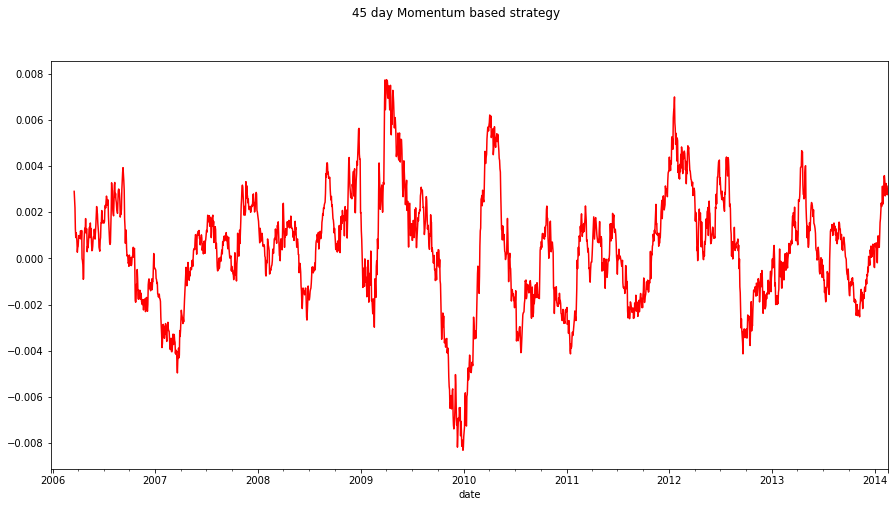

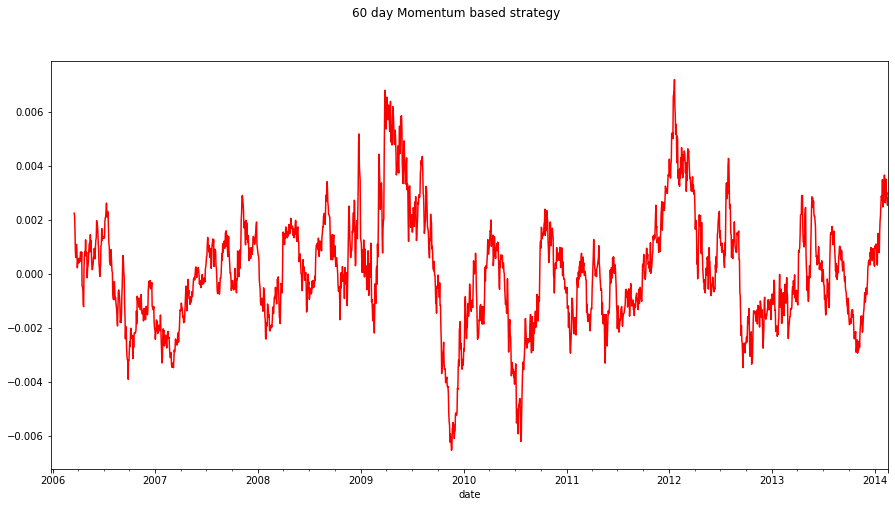

In [19]:
# Calculating figures and plotting portfolio
resultsdf = pd.DataFrame(columns = [0, 1, 2])
for i in maxlaglist:
    print(str(i) + ' day Momentum based strategy')
    # Calculating T Stat and Sharpe Ratio
    tstat = highminuslow[i].describe()['mean']/(highminuslow[i].describe()['std'] / np.sqrt(highminuslow[i].describe()['count']))
    print('t-stat: ', tstat)
    sharpe = highminuslow[i].describe()['mean']/highminuslow[i].describe()['std'] * np.sqrt(12)
    print('Sharpe Ratio:', sharpe)
    # Plotting Portfolio Performance
    fig = plt.figure(figsize = (15, 7.5))
    highminuslow[i].rolling(60).mean().plot(color='r')
    fig.suptitle(str(i) + ' day Momentum based strategy')
#     fig.show()
    # Saving to dataframe
    resultsdf = resultsdf.append(pd.Series([i,sharpe, tstat]), ignore_index = True)
#     fig.savefig('graphs/momentum_' + str(i))

In [20]:
resultsdf.columns = ['Time Horizon', 'Sharpe Ratio', 'T Stat']
for col in resultsdf.columns:
    resultsdf[col] = np.round(resultsdf[col], 3)
resultsdf['Time Horizon'] = resultsdf['Time Horizon'].apply(lambda x: str(int(x)) + ' days')

In [21]:
resultsdf

,Time Horizon,Sharpe Ratio,T Stat
0,15 days,-0.082,-1.091
1,30 days,0.067,0.894
2,45 days,0.079,1.053
3,60 days,0.027,0.365
